In [9]:
import os
from glob import glob
import warnings
import json
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [10]:
stats_root = '/home/meso/data/cross-section-photos/analysis/pipeline_stats'

In [18]:
#list files
npz_ffn_list = sorted(glob(stats_root + '/*.npz'))

#plot some stats
hail_id_list = []
mean_edge_radius_list = []
max_edge_radius_list = []
total_dry_sa = []
n_layers = []

#unpack
for npz_ffn in npz_ffn_list:
    npz_fn = os.path.basename(npz_ffn)
    hail_id = int(npz_fn[6:8])
    data = np.load(npz_ffn)
    hail_id_list.append(hail_id)
    mean_edge_radius_list.append(data['mean_edge_radius'])
    max_edge_radius_list.append(data['max_edge_radius'])
    total_dry_sa.append(data['total_dry_sa'])
    n_layers.append(data['n_layers'])
    

mean_edge_radius_array = np.array(mean_edge_radius_list)
max_edge_radius_array = np.array(max_edge_radius_list)
total_dry_array = np.array(total_dry_sa)
n_layers_array = np.array(n_layers)

perc_dry_growth = total_dry_array/(math.pi*(mean_edge_radius_array**2))

Text(0, 0.5, 'mean radius (mm)')

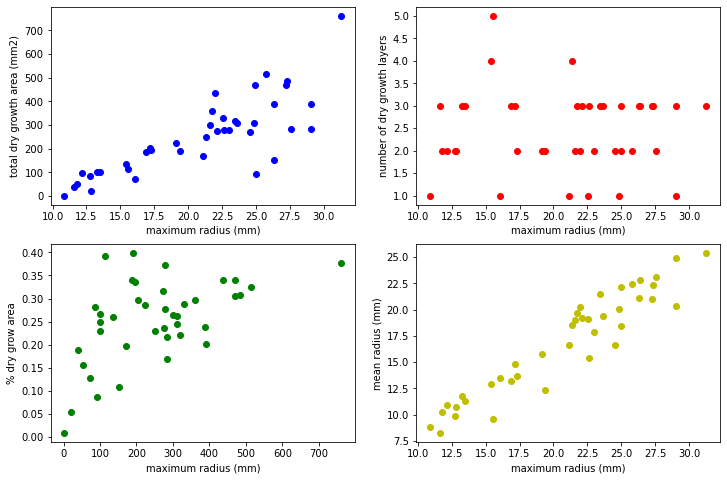

In [32]:
#make some plots

fig = plt.figure(figsize=[12,8])
plt.subplot(221)
plt.plot(max_edge_radius_array, total_dry_array, 'bo')
plt.xlabel('maximum radius (mm)')
plt.ylabel('total dry growth area (mm2)')

plt.subplot(222)
plt.plot(max_edge_radius_array, n_layers_array, 'ro')
plt.xlabel('maximum radius (mm)')
plt.ylabel('number of dry growth layers')

plt.subplot(223)
plt.plot(total_dry_array, perc_dry_growth, 'go')
plt.xlabel('maximum radius (mm)')
plt.ylabel('% dry grow area')

plt.subplot(224)
plt.plot(max_edge_radius_array, mean_edge_radius_array, 'yo')
plt.xlabel('maximum radius (mm)')
plt.ylabel('mean radius (mm)')
